# Name : Leya Rony

# TSF GRIP TASK 2: Prediction using Unsupervised ML

**To predict the optimum number of clusters and to represent it visually using 'Iris' dataset**

# K-Means Clustering

K-Means is an unsupervised clustering algorithm that is used to group data into k-clusters.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn import datasets

## Loading Dataset
Dataset:  https://bit.ly/3kXTdox

In [15]:
iris = datasets.load_iris()
ir_df = pd.DataFrame(iris.data, columns = iris.feature_names)
ir_df.head(151)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 1.0, 'Iris Scatter Plot')

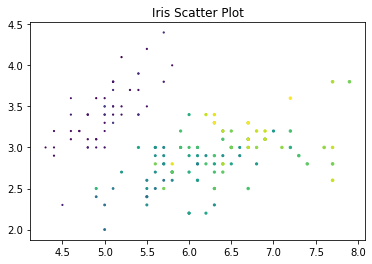

In [16]:
x= ir_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[:,0],x[:,1],x[:,2],x[:,3])
plt.title('Iris Scatter Plot')

# Find optimum no: of Clusters
**Elbow method to find optimal K value**

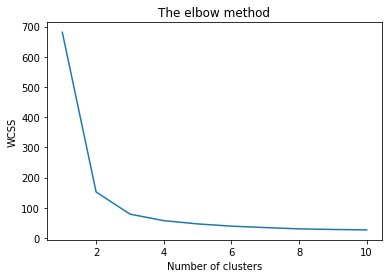

In [25]:
x = ir_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

## Training the K-Means model on dataset
 **From the above graph optimum clusters is where the elbow occurs.**

 **From this we take the number of clusters as 3**

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualizing the predicted clusters

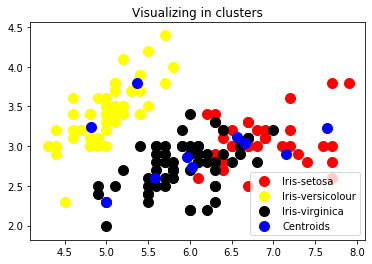

In [29]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'black', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'blue', label = 'Centroids')

plt.title('Visualizing in clusters', fontsize=12)
plt.legend()